# Linear regression problem 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [8]:
counts = df.sex.value_counts()
counts

male      676
female    662
Name: sex, dtype: int64

In [11]:
counts = df.region.value_counts()
counts

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Finding the Correlation

In [4]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


### Removing non important features 

In [13]:
df.drop(['sex','region'],axis=1, inplace=True)

In [14]:
df.head()

,age,bmi,children,smoker,charges
0,19,27.900,0,yes,16884.92400
1,18,33.770,1,no,1725.55230
2,28,33.000,3,no,4449.46200
3,33,22.705,0,no,21984.47061
4,32,28.880,0,no,3866.85520


In [15]:
counts = df.smoker.value_counts()

In [16]:
counts

no     1064
yes     274
Name: smoker, dtype: int64

In [26]:
dummy = pd.get_dummies(df.smoker,prefix='smoking')
dummy

,smoking_no,smoking_yes
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1333,1,0
1334,1,0
1335,1,0
1336,1,0


In [27]:
df = pd.concat([df,dummy],axis=1)
df

,age,bmi,children,smoker,charges,no,yes,smoking_no,smoking_yes
0,19,27.900,0,yes,16884.92400,0,1,0,1
1,18,33.770,1,no,1725.55230,1,0,1,0
2,28,33.000,3,no,4449.46200,1,0,1,0
3,33,22.705,0,no,21984.47061,1,0,1,0
4,32,28.880,0,no,3866.85520,1,0,1,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,no,10600.54830,1,0,1,0
1334,18,31.920,0,no,2205.98080,1,0,1,0
1335,18,36.850,0,no,1629.83350,1,0,1,0
1336,21,25.800,0,no,2007.94500,1,0,1,0


In [30]:
df.drop(['smoker','no','yes'],axis=1,inplace = True)

In [31]:
df

,age,bmi,children,charges,smoking_no,smoking_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,1,0
1335,18,36.850,0,1629.83350,1,0
1336,21,25.800,0,2007.94500,1,0


In [32]:
df.isnull().sum()

age            0
bmi            0
children       0
charges        0
smoking_no     0
smoking_yes    0
dtype: int64

## finding the outlier with IQR method(interquartile range) 

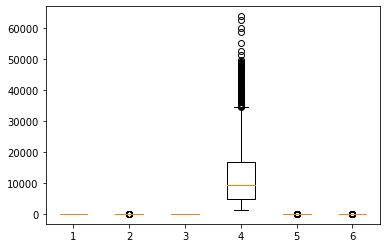

In [38]:
plt.boxplot(df)
plt.show()

In [33]:
# removing the outliers
q1 = df.quantile(.25)
q1

age              27.00000
bmi              26.29625
children          0.00000
charges        4740.28715
smoking_no        1.00000
smoking_yes       0.00000
Name: 0.25, dtype: float64

In [34]:
q3 = df.quantile(.75)
q3

age               51.000000
bmi               34.693750
children           2.000000
charges        16639.912515
smoking_no         1.000000
smoking_yes        0.000000
Name: 0.75, dtype: float64

In [35]:
#interquartile range
iqr = q3 - q1
iqr

age               24.000000
bmi                8.397500
children           2.000000
charges        11899.625365
smoking_no         0.000000
smoking_yes        0.000000
dtype: float64

In [36]:
# lower bracket
lb = q1 - 1.5 * iqr
lb

age               -9.000000
bmi               13.700000
children          -3.000000
charges       -13109.150897
smoking_no         1.000000
smoking_yes        0.000000
dtype: float64

In [43]:
hb = q3 + 1.5 * iqr
hb

age               87.000000
bmi               47.290000
children           5.000000
charges        34489.350562
smoking_no         1.000000
smoking_yes        0.000000
dtype: float64

In [41]:
df

,age,bmi,children,charges,smoking_no,smoking_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,1,0
1335,18,36.850,0,1629.83350,1,0
1336,21,25.800,0,2007.94500,1,0


### Removing the outliers and taking the clean data

In [46]:
cleanDf = df[(df >= lb) & (df <= hb)]
cleanDf

,age,bmi,children,charges,smoking_no,smoking_yes
0,19,27.900,0,16884.92400,NaN,NaN
1,18,33.770,1,1725.55230,1.0,0.0
2,28,33.000,3,4449.46200,1.0,0.0
3,33,22.705,0,21984.47061,1.0,0.0
4,32,28.880,0,3866.85520,1.0,0.0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1.0,0.0
1334,18,31.920,0,2205.98080,1.0,0.0
1335,18,36.850,0,1629.83350,1.0,0.0
1336,21,25.800,0,2007.94500,1.0,0.0


In [47]:
cleanDf.isnull().sum()

age              0
bmi              9
children         0
charges        139
smoking_no     274
smoking_yes    274
dtype: int64

In [48]:
cleanDf = cleanDf.drop(['smoking_no','smoking_yes'],axis = 1)

In [49]:
cleanDf

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [50]:
median = cleanDf.charges.median()
cleanDf.charges.fillna(median,inplace=True)

In [53]:

cleanDf.isnull().sum()

age         0
bmi         9
children    0
charges     0
dtype: int64

In [55]:
median = cleanDf.bmi.median()
cleanDf.bmi.fillna(median,inplace=True)
cleanDf.isnull().sum()

age         0
bmi         0
children    0
charges     0
dtype: int64

In [56]:
X = cleanDf.drop('charges',axis=1)

In [57]:
y = cleanDf.charges

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=40)

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
model = LinearRegression()

In [62]:
model.fit(X_train,y_train)

LinearRegression()

In [66]:
y_pred =model.predict(X_test)

### Using evalutation matrics to evaluate the model 

In [64]:
from sklearn.metrics import mean_squared_error

In [67]:
mse = mean_squared_error(y_test,y_pred)
print('mse ', mse)

mse  39817525.808469065


In [68]:
rmse = np.sqrt(mse)
rmse

6310.112979057432